In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import signal
import pandas as pd

In [3]:
def dividir_senal_en_segmentos(senal, tamano_segmento):
    segmentos = []
    for i in range(0, len(senal), tamano_segmento):
        segmento = senal[i:i+tamano_segmento]
        if len(segmento) == tamano_segmento:
            segmentos.append(segmento)
    segmentos = np.asarray(segmentos)
    shape = np.shape(segmentos)
    segmentos = segmentos.reshape(shape[0],shape[1])
    return segmentos

In [4]:
# Cargas datos de archivo .mat, H de Healthy y I de inner fault, total de 9
# Datasets
#Velocidad aumentando
from scipy.signal import get_window, stft
from scipy.io import loadmat
signal  = sio.loadmat(r'I-A-2.mat')
signal = signal['Channel_1']
segmentos = dividir_senal_en_segmentos(signal, 153610)

FileNotFoundError: [Errno 2] No such file or directory: 'I-A-2.mat'

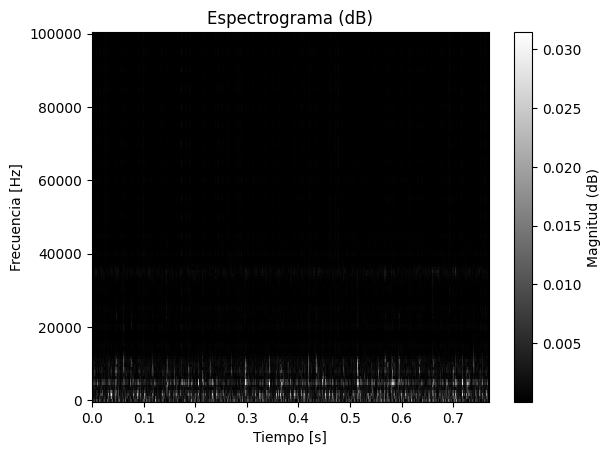

In [30]:
ancho = 256
window_func = np.hamming(ancho)
f_s, t_s, Zxx_s = stft((segmentos[0]).T, fs=200000, window=window_func, nperseg=ancho)

# Cálculo de la magnitud en dB
magnitude_dB = 10 * np.log10(np.abs(Zxx_s))

# Visualización del espectrograma en dB
plt.pcolormesh(t_s, f_s, np.abs(Zxx_s), cmap='gray')
plt.colorbar(label='Magnitud (dB)')
plt.title('Espectrograma (dB)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.show()

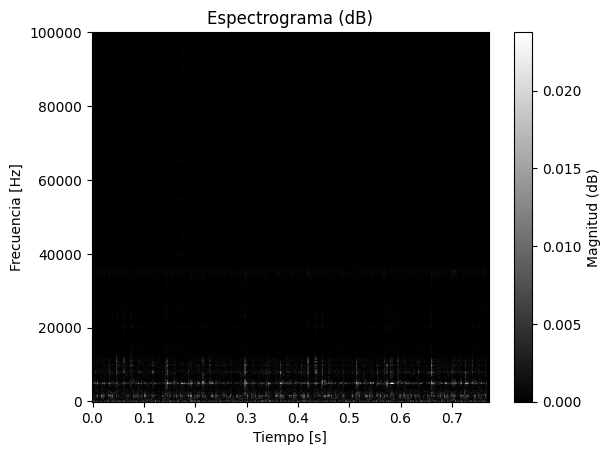

In [28]:
ancho = 1024
window_func = np.hamming(ancho)
f_s, t_s, Zxx_s = stft((segmentos[0]).T, fs=200000, window=window_func, nperseg=ancho)

# Cálculo de la magnitud en dB
max_amp = np.max(np.abs(Zxx_s))

# Visualización del espectrograma en dB
plt.pcolormesh(t_s, f_s, np.abs(Zxx_s), cmap='gray', vmin=0, vmax= max_amp)
plt.colorbar(label='Magnitud (dB)')
plt.title('Espectrograma (dB)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.show()

### Crear función para visulizar respuesta de kernel segun tipo de falla en la imagen.

In [51]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt

def plot_filters(image_path, model_path, output_name):
    # Carga el modelo pre-entrenado
    modelo_pre_entrenado = tf.keras.models.load_model(model_path)
    conv_layer_index = [0, 2]  # Para definir un modelo más corto
    outputs = [modelo_pre_entrenado.layers[i].output for i in conv_layer_index]
    model_short = Model(inputs=modelo_pre_entrenado.inputs, outputs=outputs)
    print(model_short.summary())

    # Carga la imagen y la procesa
    data = Image.open(image_path).convert('L')
    data = data.resize((128, 128))
    data = np.array(data)


    data = np.expand_dims(data, axis=0)


    feature_output = model_short.predict(data)

    columns_1 = 8
    rows_1 = 8

    fig = plt.figure(figsize=(10, 4))
    # Plot de los filtros de la primera capa (64 filtros)
    #for i in range(1, columns_1*rows_1+1):
        #fig = plt.subplot(rows_1, columns_1, i)
        #fig.set_xticks([])
        #fig.set_yticks([])
        #plt.imshow(feature_output[0][0, :, :, i-1], cmap='gray')
        
    fig = plt.figure(figsize=(8, 4))
    columns_2 = 8
    rows_2 = 4
    # Plot de los filtros de la segunda capa (32 filtros)
    for j in range(1, columns_2*rows_2+1):
        fig = plt.subplot(rows_2, columns_2, j)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(feature_output[1][0, :, :, j-1], cmap='gray')
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        plt.savefig(output_name)
    plt.show()


In [40]:
import numpy as np
import tensorflow as tf
from keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt

def plot_filters1(image_path, model_path, output_name):
    # Carga el modelo pre-entrenado
    modelo_pre_entrenado = tf.keras.models.load_model(model_path)
    conv_layer_index = [0, 2]  # Para definir un modelo más corto
    outputs = [modelo_pre_entrenado.layers[i].output for i in conv_layer_index]
    model_short = Model(inputs=modelo_pre_entrenado.inputs, outputs=outputs)
    print(model_short.summary())

    # Carga la imagen y la procesa
    data = Image.open(image_path).convert('L')
    data = data.resize((128, 128))
    data = np.array(data)


    data = np.expand_dims(data, axis=0)


    feature_output = model_short.predict(data)

    columns_1 = 8
    rows_1 = 8

    fig = plt.figure(figsize=(12, 12))
    # Plot de los filtros de la primera capa (64 filtros)
    for i in range(1, columns_1*rows_1+1):
        fig = plt.subplot(rows_1, columns_1, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(feature_output[0][0, :, :, i-1], cmap='gray')
        plt.savefig(output_name)
    plt.show()
    #fig = plt.figure(figsize=(8, 4))
    #columns_2 = 8
    #rows_2 = 4
    # Plot de los filtros de la segunda capa (32 filtros)
    #for j in range(1, columns_2*rows_2+1):
        #fig = plt.subplot(rows_2, columns_2, j)
        #fig.set_xticks([])
        #fig.set_yticks([])
        #plt.imshow(feature_output[1][0, :, :, j-1], cmap='gray')
        #plt.subplots_adjust(wspace=0.1, hspace=0.1)
        #plt.savefig(output_name)


In [41]:
image_path = 'banco_mfpt/Banco_LOCAL_COLOR/B-A-1_0.png'  
model_path = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

image_path_2 = 'banco_mfpt/Banco_LOCAL_COLOR/H-A-1_0.png' 
model_path_2 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

image_path_3 = 'banco_mfpt/Banco_LOCAL_COLOR/I-A-2_0.png'  
model_path_3 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

image_path_4 = 'banco_mfpt/Banco_LOCAL_COLOR/O-A-1_0.png'  
model_path_4 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

image_path_5 = 'banco_mfpt/Banco_LOCAL_COLOR/C-A-1_0.png' 
model_path_5 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 30ms/st

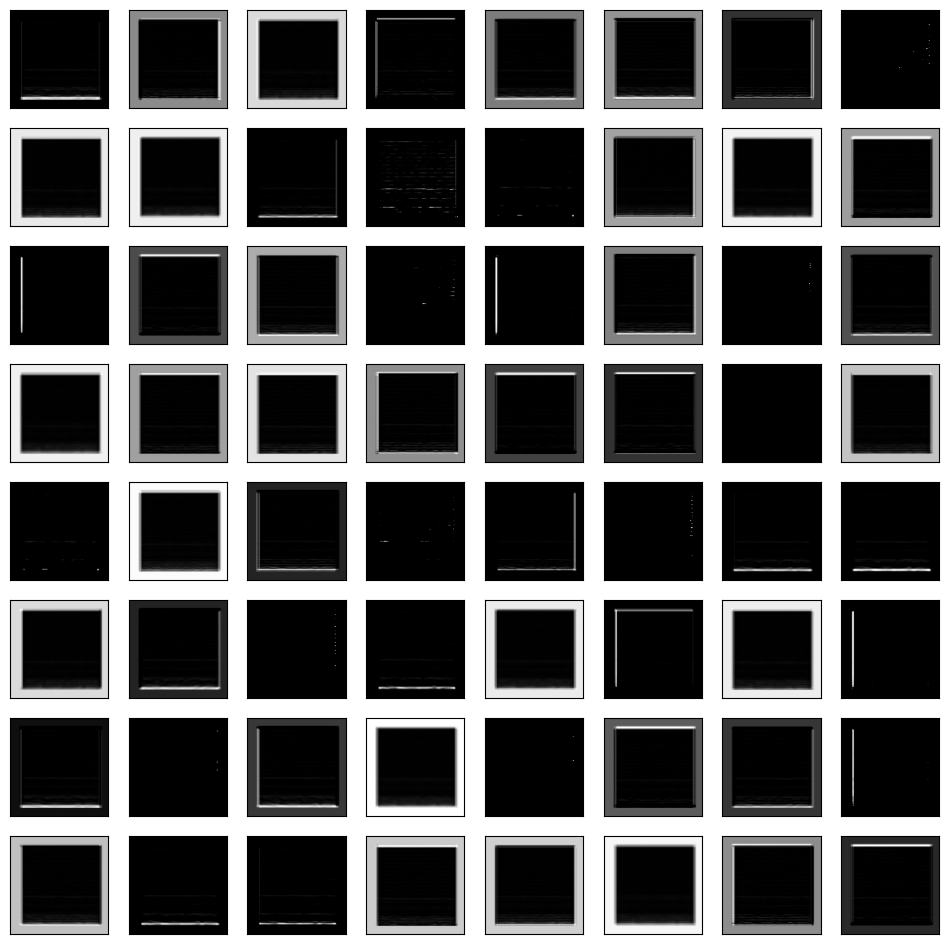

In [42]:

nombre_1 ='bola_feature_maps.png'
#plot_filters(image_path, model_path, nombre_1)
plot_filters1(image_path, model_path, nombre_1)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 30ms/st

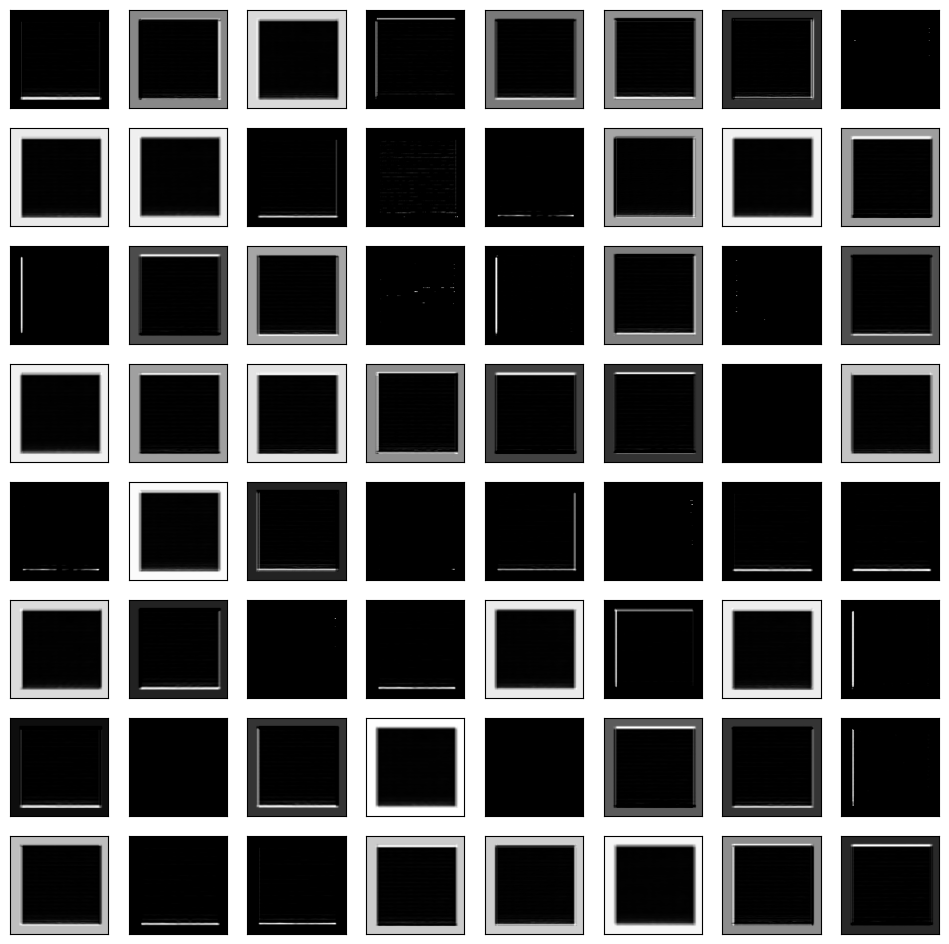

In [43]:

nombre_2 ='normal_feature_maps.png'
plot_filters1(image_path_2, model_path_2,nombre_2)

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 31ms/st

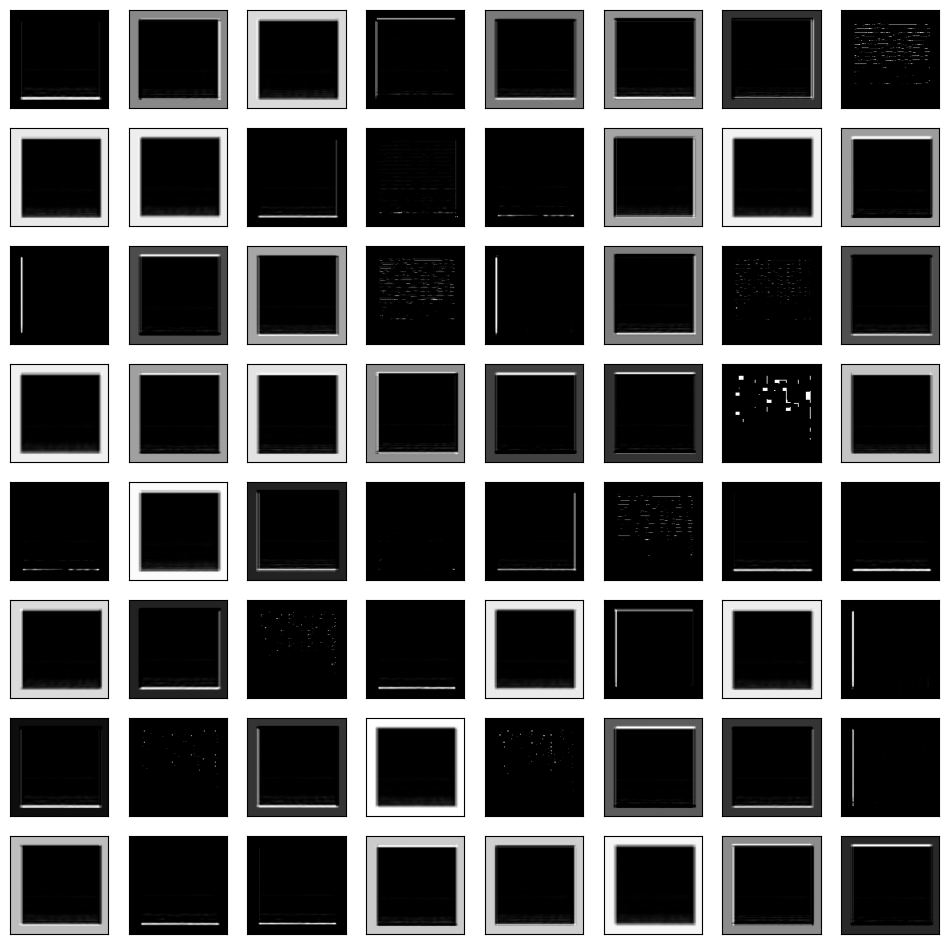

In [44]:
nombre_3 ='interna_feature_maps.png'
plot_filters1(image_path_3, model_path_3, nombre_3)

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 31ms/st

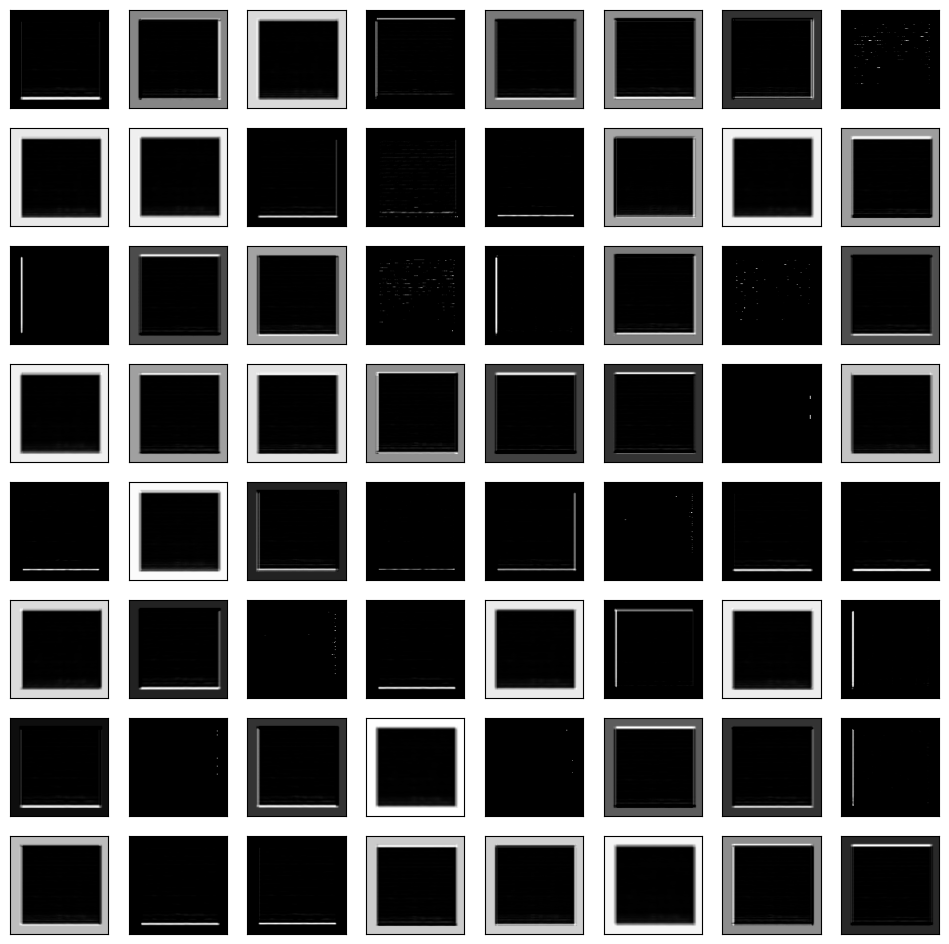

In [45]:
nombre_4 = 'externa_feature_maps.png'
plot_filters1(image_path_4, model_path_4, nombre_4)

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_636_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_636 (Conv2D)         (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_636 (MaxPooli  (None, 62, 62, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_637 (Conv2D)         (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 32ms/st

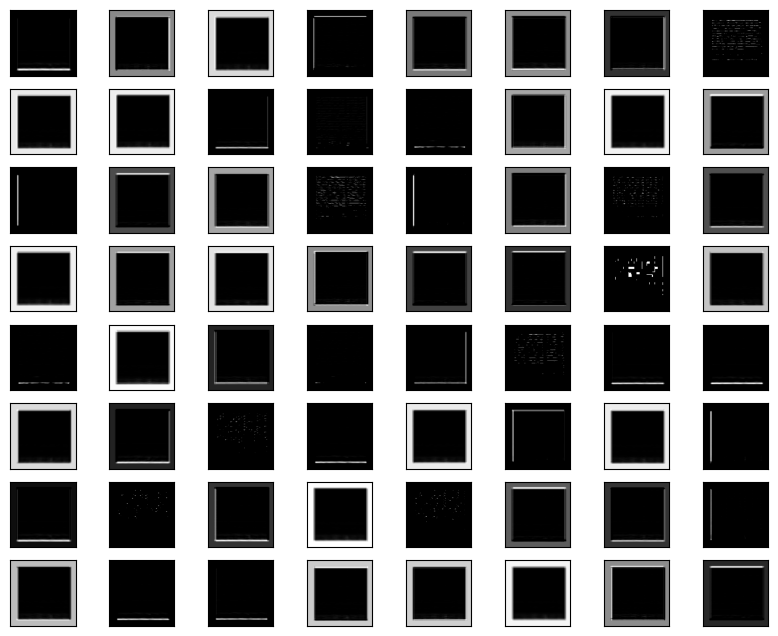

In [34]:
nombre_5 = 'combinadaa_feature_maps.png'
plot_filters1(image_path_5, model_path_5,nombre_5)

In [55]:
image_path = 'BANCOS/grey/4096/10giros/Banco_LOCAL_COLOR/I-A-2_0.png'  
model_path = 'resultados-cnn/models/r2-4096-LOCAL_iter_8.h5'

image_path_2 = 'banco_mfpt/Banco_LOCAL_COLOR/H-A-1_0.png' 
model_path_2 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

image_path_3 = 'banco_mfpt/Banco_LOCAL_COLOR/I-A-2_0.png'  
model_path_3 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

image_path_4 = 'banco_mfpt/Banco_LOCAL_COLOR/O-A-1_0.png'  
model_path_4 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

image_path_5 = 'banco_mfpt/Banco_LOCAL_COLOR/C-A-1_0.png' 
model_path_5 = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36_input (InputLayer  [(None, 128, 128, 1)]    0         
 )                                                               
                                                                 
 conv2d_36 (Conv2D)          (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 62, 62, 32)        51232     
                                                                 
Total params: 52,896
Trainable params: 52,896
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 31ms/st

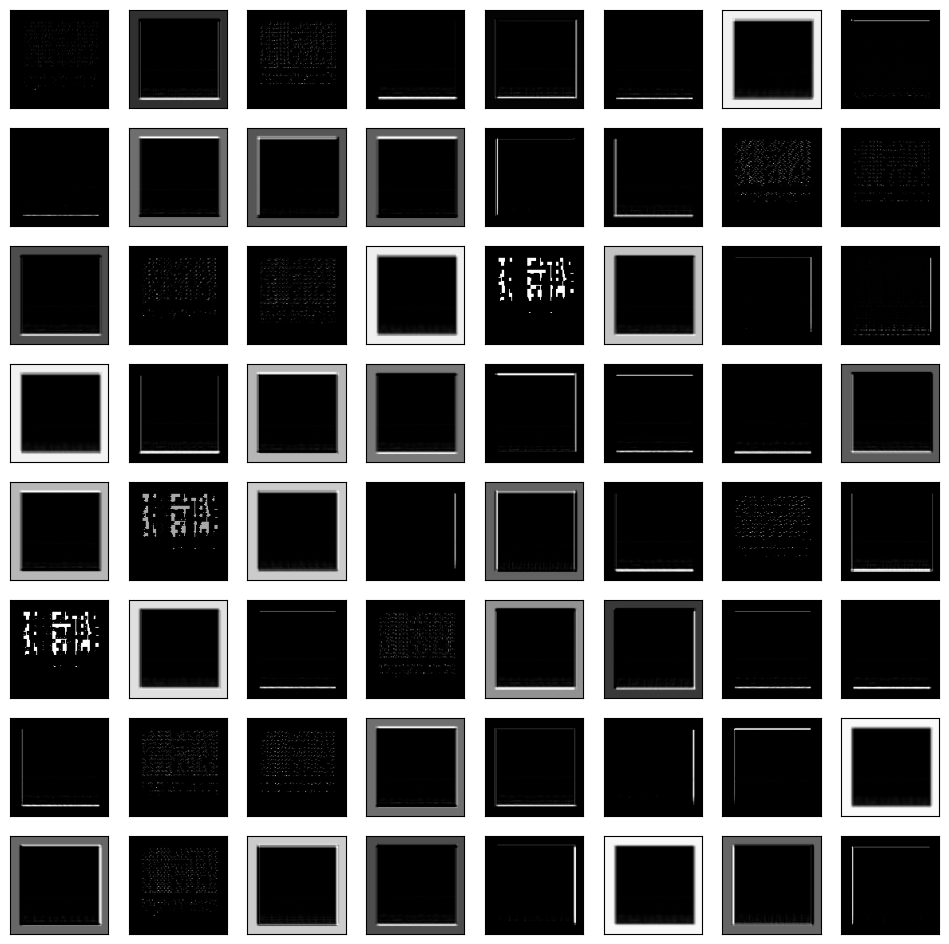

In [57]:

nombre_1 ='interna_feature_maps.png'
#plot_filters(image_path, model_path, nombre_1)
plot_filters1(image_path, model_path, nombre_1)

### T-sne

In [74]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob

In [75]:
def prepros_bancoimagenes3(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'H':
            y.append(0)
        if name[0] == 'I':
            y.append(1)
        if name[0] == 'O':
            y.append(2)
        if name[0] == 'B':
            y.append(3)
        if name[0] == 'C':
            y.append(4)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 5)
    y_val = keras.utils.to_categorical(y_val, 5)
    y_test = keras.utils.to_categorical(y_test, 5)

    return x_train, x_test, x_val, y_train, y_test, y_val, X, y

In [ ]:
mydir_1 = r"BANCOS/grey/16384/1seg/Banco_GLOBAL_COLOR"
mydir_2 = r"BANCOS/grey/16384/1seg/Banco_LOCAL_COLOR" 
mydir_3 = r"BANCOS/grey/16384/1seg/Banco_SENAL_COLOR" 

mydir_4 = r"BANCOS/grey/16384/10giros/Banco_GLOBAL_COLOR"
mydir_5 = r"BANCOS/grey/16384/10giros/Banco_LOCAL_COLOR" 
mydir_6 = r"BANCOS/grey/16384/10giros/Banco_SENAL_COLOR" 

mydir_7 = r"BANCOS/grey/16384/0,6seg/Banco_GLOBAL_COLOR"
mydir_8 = r"BANCOS/grey/16384/0,6seg/Banco_LOCAL_COLOR" 
mydir_9 = r"BANCOS/grey/16384/0,6seg/Banco_SENAL_COLOR" 

In [81]:
from os import listdir
from os.path import join

mydir_3 = r"BANCOS/grey/16384/10giros/Banco_GLOBAL_COLOR" 
mydir_4 = r"BANCOS/grey/16384/10giros/Banco_LOCAL_COLOR" 
mydir_5 = r"BANCOS/grey/16384/10giros/Banco_SENAL_COLOR" 
x_train_3, x_test_3, x_val_3, y_train_3, y_test_3, y_val_3, X, y = prepros_bancoimagenes3(mydir_3, 0.2, 0.1)
x_train_4, x_test_4, x_val_4, y_train_4, y_test_4, y_val_4, X, y = prepros_bancoimagenes3(mydir_4, 0.2, 0.1)
x_train_5, x_test_5, x_val_5, y_train_5, y_test_5, y_val_5, X, y = prepros_bancoimagenes3(mydir_5, 0.2, 0.1)

(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)


In [108]:
x_train_3.shape

(781, 128, 128, 1)

25/25 [==============================] - 1s 20ms/step


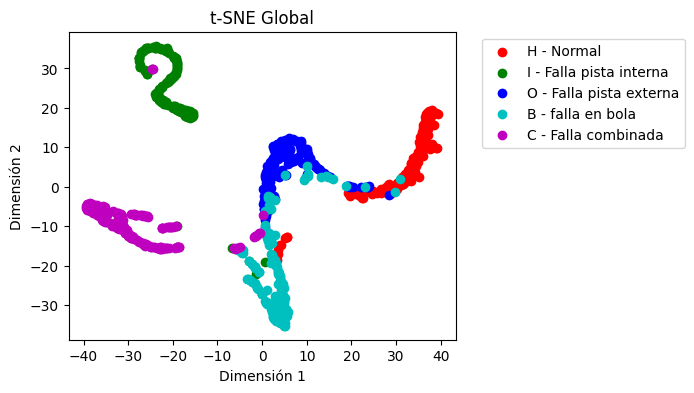

In [88]:
### t-sne global
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.models import load_model

# Cargar el modelo
model_path = 'resultados-cnn/models/GLOBAL-10giros-16384_iter_4.h5'
model = load_model(model_path)


layer_name = 'dense_609'  
intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)


data = x_train_3  
labels = y_train_3 


labels = np.argmax(labels, axis=1)

features = intermediate_model.predict(data)


tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)


plt.figure(figsize=(5, 4))
num_classes = len(np.unique(labels))

clases = ['H - Normal', 'I - Falla pista interna', 'O - Falla pista externa', 'B - falla en bola', 'C - Falla combinada']
colors = ['r', 'g', 'b', 'c', 'm']  
for i in range(num_classes):
    plt.scatter(embedded_features[labels == i, 0], embedded_features[labels == i, 1], c=colors[i], label=clases[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('t-SNE Global')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')


plt.savefig('grafico_tsne_global.png', bbox_inches='tight')

plt.show()


25/25 [==============================] - 0s 7ms/step


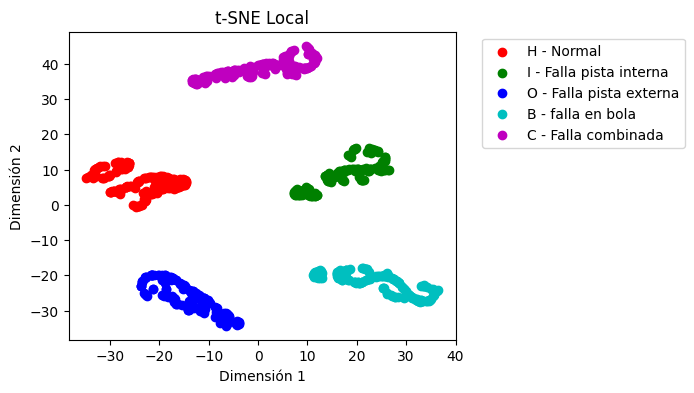

In [91]:
### t-sne local
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.models import load_model

# Cargar el modelo
model_path = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'
model = load_model(model_path)


layer_name = 'dense_637'  
intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)


data = x_train_4  
labels = y_train_4 


labels = np.argmax(labels, axis=1)


features = intermediate_model.predict(data)


tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)


plt.figure(figsize=(5, 4))
num_classes = len(np.unique(labels))

clases = ['H - Normal', 'I - Falla pista interna', 'O - Falla pista externa', 'B - falla en bola', 'C - Falla combinada']
colors = ['r', 'g', 'b', 'c', 'm']  # Colors for each class
for i in range(num_classes):
    plt.scatter(embedded_features[labels == i, 0], embedded_features[labels == i, 1], c=colors[i], label=clases[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('t-SNE Local')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')


plt.savefig('grafico_tsne_local.png', bbox_inches='tight')

plt.show()


25/25 [==============================] - 0s 10ms/step


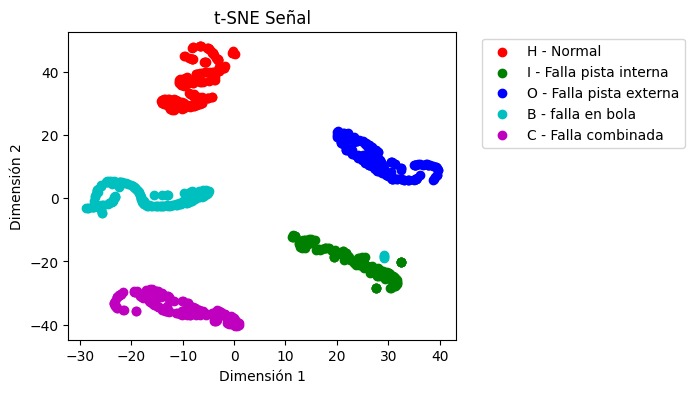

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.models import load_model

# Cargar el modelo
model_path = 'resultados-cnn/models/SENAL-10giros-16384_iter_2.h5'
model = load_model(model_path)

# Obtener las características de una capa intermedia
layer_name = 'dense_645'  
intermediate_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Cargar los datos de entrada y las etiquetas correspondientes
data = x_train_5  
labels = y_train_5 


labels = np.argmax(labels, axis=1)

# Get the intermediate layer features for the input data
features = intermediate_model.predict(data)


tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)


plt.figure(figsize=(5, 4))
num_classes = len(np.unique(labels))

clases = ['H - Normal', 'I - Falla pista interna', 'O - Falla pista externa', 'B - falla en bola', 'C - Falla combinada']
colors = ['r', 'g', 'b', 'c', 'm']  # Colors for each class
for i in range(num_classes):
    plt.scatter(embedded_features[labels == i, 0], embedded_features[labels == i, 1], c=colors[i], label=clases[i])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('t-SNE Señal')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')


plt.savefig('grafico_tsne_senal.png', bbox_inches='tight')
plt.show()


In [93]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

def maximum_median_discrepancy(X, Y, sigma=1.0):
    n = X.shape[0]
    m = Y.shape[0]
    XY = np.vstack((X, Y))
    K = rbf_kernel(XY, gamma=1.0/(2 * sigma**2))
    
    # Dividir la matriz de kernel en submatrices
    Kxx = K[:n, :n]
    Kyy = K[n:, n:]
    Kxy = K[:n, n:]
    Kyx = K[n:, :n]
    
    # Calcular las sumas necesarias
    sum_xx = (1.0 / (n * (n - 1))) * np.sum(Kxx - np.diag(np.diag(Kxx)))
    sum_yy = (1.0 / (m * (m - 1))) * np.sum(Kyy - np.diag(np.diag(Kyy)))
    sum_xy = (1.0 / (n * m)) * np.sum(Kxy)
    sum_yx = (1.0 / (m * n)) * np.sum(Kyx)
    
    mmd = np.sqrt(sum_xx + sum_yy - 2 * sum_xy)
    
    return mmd

In [97]:
!pip install scikit-image

     ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
     - -------------------------------------- 0.6/22.9 MB 12.4 MB/s eta 0:00:02
     ------- -------------------------------- 4.4/22.9 MB 46.5 MB/s eta 0:00:01
     ----------------- ---------------------- 9.8/22.9 MB 69.3 MB/s eta 0:00:01
     ------------------------- ------------ 15.2/22.9 MB 108.8 MB/s eta 0:00:01
     ---------------------------------- --- 20.6/22.9 MB 131.2 MB/s eta 0:00:01
     -------------------------------------  22.9/22.9 MB 110.0 MB/s eta 0:00:01
     -------------------------------------  22.9/22.9 MB 110.0 MB/s eta 0:00:01
     --------------------------------------- 22.9/22.9 MB 50.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ---------------------------------------- 2.1/2.1 MB 66.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/219.4 kB ? eta -:--:--
     ---------------------------------------- 219.4/219.4 kB ? et

In [121]:
import os
import glob
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize
from PIL import Image

def preprocess_image(image):
    
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    # Convertir la imagen a escala de grises
    gray_image = rgb2gray(image)
    
    # Cambiar el tamaño de la imagen si es necesario
    resized_image = resize(gray_image, (128, 128))
    
    # Extraer las características HOG
    features = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    
    return features

# Ruta de la carpeta que contiene las imágenes del conjunto X
folder_X = 'banco_mfpt/Banco_LOCAL_COLOR'

# Ruta de la carpeta que contiene las imágenes del conjunto Y
folder_Y = 'BANCOS/grey/16384/10giros/Banco_GLOBAL_COLOR'

# Obtener la lista de archivos de imagen en la carpeta X
image_files_X = glob.glob(os.path.join(folder_X, '*.png'))

# Obtener la lista de archivos de imagen en la carpeta Y
image_files_Y = glob.glob(os.path.join(folder_Y, '*.png'))

# Inicializar listas para almacenar las características preprocesadas
X_features = []
Y_features = []

# Procesar cada imagen del conjunto X
for image_file_X in image_files_X:
    # Cargar la imagen
    image_X = Image.open(image_file_X)
    
    # Preprocesar la imagen y obtener las características
    preprocessed_X = preprocess_image(image_X)
    
    # Agregar las características a la lista correspondiente
    X_features.append(preprocessed_X)

# Procesar cada imagen del conjunto Y
for image_file_Y in image_files_Y:
    # Cargar la imagen
    image_Y = Image.open(image_file_Y)
    
    # Preprocesar la imagen y obtener las características
    preprocessed_Y = preprocess_image(image_Y)
    
    # Agregar las características a la lista correspondiente
    Y_features.append(preprocessed_Y)

# Convertir las listas de características en matrices
X = np.array(X_features)
Y = np.array(Y_features)

# Calcular la Maximum Median Discrepancy
mmd_value = maximum_median_discrepancy(X, Y)

# Imprimir el valor de MMD
print("Maximum Median Discrepancy:", mmd_value)




Maximum Median Discrepancy: -5.644188856661048


In [107]:
X_features

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [99]:
image_Y.shape

NameError: name 'image_Y' is not defined

In [116]:
def maximum_median_discrepancy(X, Y):
    # Aplanar las matrices de imágenes para que tengan la forma (N, D),
    # donde N es el número de imágenes y D es la dimensión de la imagen
    X = np.reshape(X, (X.shape[0], -1))
    Y = np.reshape(Y, (Y.shape[0], -1))

    # Calcular las matrices de distancias euclidianas entre los conjuntos X e Y
    dist_X = cdist(X, X, 'euclidean')
    dist_Y = cdist(Y, Y, 'euclidean')
    dist_XY = cdist(X, Y, 'euclidean')

    # Calcular las medianas de las matrices de distancias
    median_X = np.median(dist_X)
    median_Y = np.median(dist_Y)
    median_XY = np.median(dist_XY)

    # Calcular el Maximum Median Discrepancy
    mmd_value = median_X + median_Y - 2 * median_XY
    return mmd_value

In [113]:
def prepros_bancoimagenes(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'n':
            y.append(0)
        if name[0] == 'i':
            y.append(1)
        if name[0] == 'o':
            y.append(2)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 3)
    y_val = keras.utils.to_categorical(y_val, 3)
    y_test = keras.utils.to_categorical(y_test, 3)

    return x_train, x_test, x_val, y_train, y_test, y_val

In [111]:
from os import listdir
from os.path import join

mydir_6 = r"BANCOS/grey/16384/10giros/Banco_LOCAL_COLOR"  
x_train_otawa, x_test_otawa, x_val_otawa, y_train_otawa, y_test_otawa, y_val_otawa, X, y = prepros_bancoimagenes3(mydir_6, 0.2, 0.1)

(1086, 128, 128)
(1086,)


In [119]:
mydir_7 = r"banco_mfpt/banco_transfer_mfpt_3giros" 
x_train_mpft, x_test_mpft, x_val_mpft, y_train_mpft, y_test_mpft, y_val_mpft= prepros_bancoimagenes(mydir_7, 0.7, 0.1)

(500, 128, 128)
(500,)


In [120]:
import numpy as np
from scipy.spatial.distance import cdist
# Calcular el Maximum Median Discrepancy entre x_train_1 y x_train_2
mmd_value = maximum_median_discrepancy(x_train_otawa, x_train_mpft)

# Imprimir el valor de MMD
print("Maximum Median Discrepancy:", mmd_value)

Maximum Median Discrepancy: -11.629991541447767


In [122]:
import numpy as np
from tensorflow.keras.models import load_model

# Ruta del archivo que contiene el modelo preentrenado
modelo_preentrenado = 'resultados-cnn/models/LOCAL-10giros-16384_iter_8.h5'

# Carga el modelo preentrenado
modelo = load_model(modelo_preentrenado)

# Obtén las salidas del modelo para x_train_1
salidas_x_train_1 = modelo.predict(x_train_otawa)

# Obtén las salidas del modelo para x_train_2
salidas_x_train_2 = modelo.predict(x_train_mpft)

# Calcula el MMD
mmd_value = np.median(salidas_x_train_1) - np.median(salidas_x_train_2)

# Imprime el valor de MMD
print("Maximum Median Discrepancy:", mmd_value)

5/5 [==============================] - 0s 21ms/step
Maximum Median Discrepancy: -2.5300187e-06
